## About Project
- Project About Banglore Home price prediction 
- Four major features are used for trained model and prediction of price of home.
    - Location
    - Total Square of feet area
    - Number of bath
    - Number of bedrooms
- Three algorithms are used for analysis for better prediction.
- Hyper tuning are also defined  to improve prediction performance.
- pickle and json modules are used for saving model and data for interacting with web page.

In [187]:
# import all neccessary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data 

df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape 

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [12]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis = 'columns')

df2.shape

(13320, 5)

In [13]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
# null values

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df3 = df2.dropna()
df3.shape

(13246, 5)

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [20]:
df3['size'].value_counts().head(2)

2 BHK    5198
3 BHK    4286
Name: size, dtype: int64

In [21]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(" ")[0]))

In [22]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [23]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [24]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [25]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
# function for display range of total square 


def is_float(x):
    try:
        float(x)
    except:
        return False
    
    return True

In [32]:
df3[~ df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [33]:
# taking average value from range of total_sqft


def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
convert_sqft_to_num("34.46Sq. Meter")

In [37]:
df4 = df3.copy()

In [38]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [39]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [42]:
# checking function method operation by index location
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [43]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [46]:
df5 = df4.copy()



In [48]:
df5['price_per_sqft'] = df5['price']* 100000/df5['total_sqft']

df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [50]:
len(df5.location.unique()) # numbers of unique of location

1304

In [55]:
df5.location = df5.location.apply(lambda x : x.strip())


location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [60]:
df5.groupby('location').agg('count').sort_values(by = 'size',ascending = False)

,size,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,,
Whitefield,535,533,535,535,535,533
Sarjapur Road,392,392,392,392,392,392
Electronic City,304,304,304,304,304,304
Kanakpura Road,266,264,266,266,266,264
Thanisandra,236,235,236,236,236,235
...,...,...,...,...,...,...
1 Giri Nagar,1,1,1,1,1,1
"Kanakapura Road,",1,1,1,1,1,1
Kanakapura main Road,1,1,1,1,1,1


In [61]:
len(location_stats[location_stats<=10])

1052

In [62]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [63]:
len(df5.location.unique())

1293

In [64]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x )

In [68]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [72]:
df5.location.value_counts().sort_values(ascending = True)

HAL 2nd Stage           11
LB Shastri Nagar        11
Tindlu                  11
Pattandur Agrahara      11
Narayanapura            11
                      ... 
Kanakpura Road         266
Electronic City        304
Sarjapur  Road         392
Whitefield             535
other                 2881
Name: location, Length: 242, dtype: int64

In [73]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## outlier

In [75]:
df5[df5.total_sqft/df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [76]:
df5.shape

(13246, 7)

In [78]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

df6.shape

(12502, 7)

In [79]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

(array([  3.,   2.,   2.,   2.,   0.,   4.,   4.,   6.,   2.,   9.,  15.,
         16.,  98.,  62., 207., 189., 234., 265., 439., 347., 440., 557.,
        536., 478., 520., 486., 628., 431., 439., 489., 406., 355., 343.,
        333., 271., 275., 286., 219., 228., 186., 176., 168., 139., 150.,
        117.,  90.,  99.,  62.,  68.,  64.,  74.,  36.,  45.,  43.,  29.,
         89.,  21.,  55.,  35.,  56.,  39.,  22.,  39.,  32.,  32.,  17.,
         37.,  31.,  17.,  43.,  12.,  19.,  31.,   9.,  40.,  21.,  23.,
         25.,  11.,  13.,  13.,  22.,   7.,  32.,   5.,  13.,   8.,  12.,
         20.,  14.,  13.,   6.,  12.,  31.,  12.,  12.,   5.,  12.,   5.,
         11.,   9.,   4.,  10.,   4.,  14.,   2.,   8.,   4.,   4.,   9.,
          1.,  24.,   3.,   4.,   5.,   2.,   8.,   1.,   1.,   3.,   3.,
          3.,   4.,   3.,   0.,   1.,   3.,   5.,   6.,   1.,   2.,   3.,
          1.,   1.,   2.,   1.,   0.,   2.,   0.,   1.,   9.,   1.,   1.,
          2.,   2.,   0.,   4.,   1., 

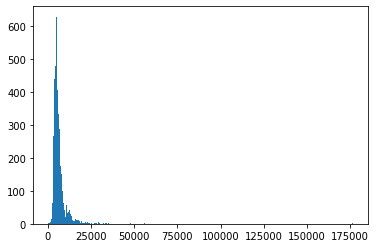

In [91]:
# histogram of price per square feet feature


plt.hist(df6.price_per_sqft,bins = 1000)

In [108]:
 for key , sub in df6.groupby('location'):
        pass

In [97]:
# To remove data which lays out of  first deviation

def remove_pps_oulier(df):
    df_out = pd.DataFrame()
    for key , sub in df6.groupby('location'):
        m = np.mean(sub.price_per_sqft)
        st = np.std(sub.price_per_sqft)
        
        reduced_df = sub[(sub.price_per_sqft>(m-st)) & (sub.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index= True)
    return df_out


df7 = remove_pps_oulier(df6)
df7.shape
           


(10241, 7)

In [98]:
df7.price_per_sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

In [102]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

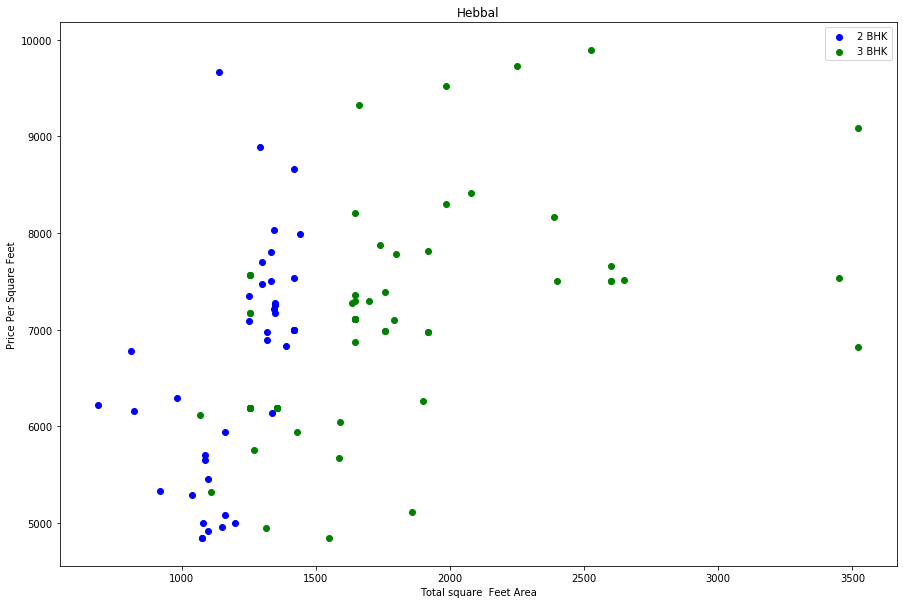

In [103]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize = (15,10))
    
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color = 'blue',label ='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color = 'green',label ='3 BHK')
    plt.xlabel("Total square  Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
    
plot_scatter_chart(df7,'Hebbal')    

Here 

We should remove properties where for same location , the price of (for example) 3 bedroom apartment 
is less than 2 bedroom apartment(with same square ft area) . we can create dictionary of stats per bhk , i.e

{
    
    '1':{
        
        'mean':4000,
        'std':2000,
        'count':34
    }
   
    '2':{
       'mean':4300,
       'std':2300,
       'count':22
   }    
    
}

Now , we can remove those 2 BHK apartment whose price_per_sqrt is less than mean price_per_sqft of 1 BHK apartment.

In [105]:
df7.shape[0]

10241

In [109]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.mean(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in  location_df.groupby('bhk'): 
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis ='index')           

In [110]:
df8 =  remove_bhk_outlier(df7)

In [111]:
df8.shape

(7329, 7)

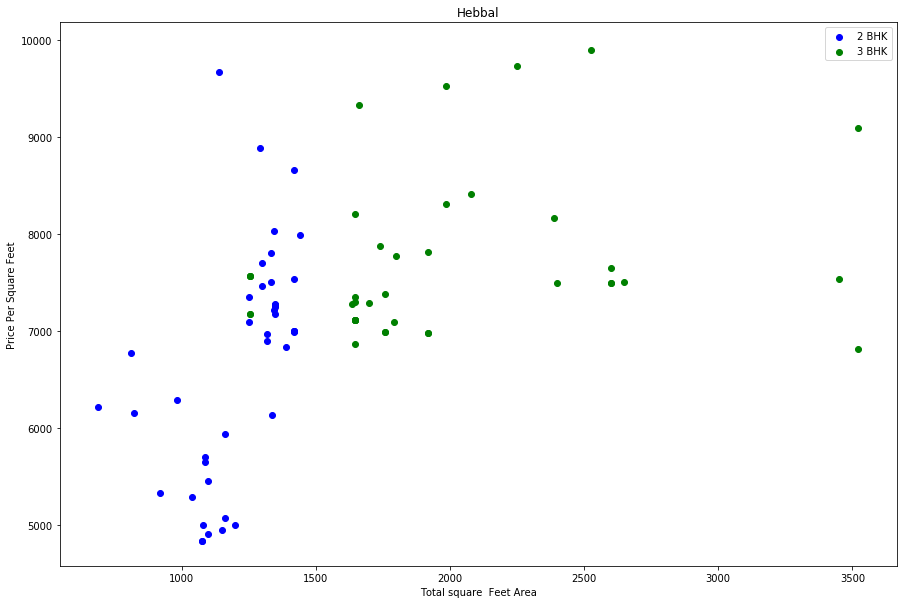

In [112]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

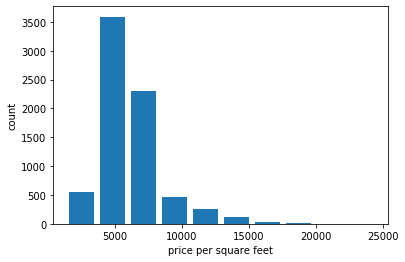

In [115]:
# histogram of price per square feet


plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [116]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [117]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [118]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

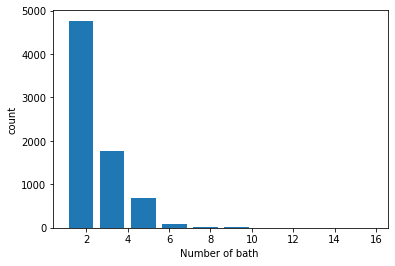

In [120]:
# histogram of bath 

plt.hist(df8.bath,rwidth =0.8)
plt.xlabel("Number of bath ")
plt.ylabel("count")

In [121]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [123]:
df8.shape

(7329, 7)

In [130]:
# remove data whose has more bath than bhk+2

df9 =  df8[~(df8.bath>df8.bhk+2)]
df9.shape

(7325, 7)

## Preparing machine learning 

In [132]:
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [133]:
# drop size and price per square 

df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [134]:
# get dummies
dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
df11 = pd.concat([df10,dummies.drop('other',axis ='columns')],axis = 'columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# drop location after get dummies

df12 = df11.drop('location',axis = 'columns')
df12.shape

(7325, 245)

In [137]:
# Sperate X and y for split 

X = df12.drop('price',axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
y =df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [140]:
# split data train and test

from sklearn.model_selection import train_test_split

X_train, X_test ,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =10)

In [183]:
# Regression model

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(normalize= True)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.801767430856352

In [144]:
# checking cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

In [182]:
# Hyper parameter tuning  via GridSearch

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


def find_best_model_using_gridsearch(X,y):
    algo = {
        'linear_regression':{
            'model':LinearRegression(),
            'param':{
                'normalize':[True,False]
            }
        } , 
         'lasso':{
             'model':Lasso(),
             'param':{
                 'alpha':[1,2],
                 'selection':['random','cyclic']
             }
         },
            
       'RandomForest':{
           'model':RandomForestRegressor(),
           'param':{
               'n_estimators':list(range(200,1000,200)),
               'max_depth':list(range(1,10,2)),
               'min_samples_leaf':[1,2,4]
           }
       }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algo.items():
        gs = GridSearchCV(config['model'],config['param'],cv =cv,return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns = ['model','best_score','best_params'])    


find_best_model_using_gridsearch(X,y)

,model,best_score,best_params
0,linear_regression,0.834855,{'normalize': True}
1,lasso,0.684367,"{'alpha': 1, 'selection': 'random'}"
2,RandomForest,0.788489,"{'max_depth': 9, 'min_samples_leaf': 1, 'n_est..."


In [185]:
def predict_price(location,sqft,bath,bhk):
    try:
        loc_index = np.where(X.columns ==location )[0][0]
        x = np.zeros(len(X.columns))
        x[0] = sqft
        x[1] = bath
        x[2] = bhk
        if loc_index >= 0:
            x[loc_index]=1
    
        return lr_clf.predict([x])[0]
    except:
        print("Invalid Parameters")


predict_price('Whitefield',1000,2,2)

47.39451315507327

In [184]:
predict_price('Indira Nagar',1000,3,3)

183.84324442032351

In [186]:
predict_price('aaaa',1000,2,16)

Invalid Parameters


## extract model 

In [179]:
import pickle

with open("home_prices_prediction_model.pickle",'wb') as f:
    pickle.dump(lr_clf,f)

In [181]:
# json for columns name data 


import json

columns = {
    'data_columns':[col.lower() for col in X.columns]
}

with open("columns.json",'w') as f:
    f.write(json.dumps(columns))